In [25]:
import os
import sys
import getopt

import parse_genet
import vi

import importlib

import simulate
import torch
import matplotlib.pyplot as plt
import numpy as np

import pyro.distributions as dist

import scipy.stats

import pandas as pd
import numpy as np
import string
import random
import time
import datetime
import PRScs

purpose: 
* test the beta

In [2]:
sim_dict = {
    'ref_dir' : '/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/LD_PRScs/ldblk_ukbb_eur', ## add my path
    'bim_prefix' : "test_data/test",
    'sst_file' : "test_data/sumstats.txt",
    'n_gwas' : 200000, 
    'out_dir' : "test_data",
    "seed" : 42, 
    "beta_std" : "False",     
    "n_iter" : 1000, 
    'anno_path': False,
    'save_fig_name':'1000SNP'      
}

chr22_dict =  {
    'ref_dir' : '/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/LD_PRScs/ldblk_ukbb_eur', ## add my path
    'bim_prefix' : "test_data/ibd_qc_chr22",
    'sst_file' : "test_data/wightman_chr22.tsv",
    'n_gwas' : 200000, 
    'out_dir' : "test_data",
    "seed" : 42, 
    "beta_std" : "False", 
    "n_iter" : 1000, 
    'anno_path': False,
    'save_fig_name':'chr22'      
}

In [33]:
import test_simulation, parse_genet

running on chr22
fig will be saved in /gpfs/commons/home/tlin/pic/casioPR/simulation/1025/prop_nz_0.05_chr22_original_fixed_iter1_v70_
... parse reference file: /gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/LD_PRScs/ldblk_ukbb_eur/snpinfo_ukbb_hm3 ...
... parse sumstats file: test_data/wightman_chr22.tsv ...
... 14014 common SNPs in the reference, sumstats, and validation set ...
There are 24 ld_block. 

using annotations from None
... parse annotations ...
No annotation used
start VI...
Re-train the model 1 time(s)
... Starting SVI ...
Degenerate LD mat (min eigenvalue=-9.060e-04), fixing to 1.000e-03
Degenerate LD mat (min eigenvalue=-2.416e-03), fixing to 1.000e-03
Degenerate LD mat (min eigenvalue=-2.087e-02), fixing to 1.000e-03
Degenerate LD mat (min eigenvalue=-5.386e-03), fixing to 1.000e-03
Degenerate LD mat (min eigenvalue=-1.032e-02), fixing to 1.000e-03
Degenerate LD mat (min eigenvalue=-3.347e-03), fixing to 1.000e-03
Degenerate LD mat (min eigenvalue=-4.880e-03), fi

KeyError: 'annotation_weights'

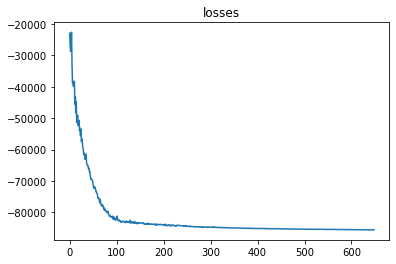

In [48]:
importlib.reload(parse_genet)
importlib.reload(test_simulation)
test_simulation.check_sim_result('prop_nz_0.05_chr22_original_fixed','None', 'chr22', prop_nz = 0.05)

## manually testing the function
* adding P value to sst

In [3]:
param_dict = chr22_dict
chrom=22
importlib.reload(parse_genet)
ref_df = parse_genet.parse_ref(param_dict['ref_dir'] + '/snpinfo_ukbb_hm3')
ref_df = ref_df[ref_df.CHR == chrom]
vld_df = parse_genet.parse_bim(param_dict['bim_prefix'] + ".bim")
vld_df = vld_df[vld_df.CHR == chrom]
sst_dict = parse_genet.parse_sumstats(ref_df, vld_df, param_dict['sst_file'], param_dict['n_gwas'])

... parse reference file: /gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/LD_PRScs/ldblk_ukbb_eur/snpinfo_ukbb_hm3 ...
... parse sumstats file: test_data/wightman_chr22.tsv ...
... 13669 common SNPs in the reference, sumstats, and validation set ...


In [5]:
param_dict['anno_path'] ==None:
    losses, beta, phi_est, stats = vi.vi(sst_dict, param_dict['n_gwas'], ld_blk, blk_size, device = device, annotations = None, max_iterations = param_dict['n_iter'], min_particles = 1, max_particles=4, desired_min_eig = 1e-3, min_iterations = 200, stall_window = 30, phi_as_prior = False, lr = 0.03, constrain_sigma = True)
        

,CHR,SNP,BP,A1,A2,MAF,BETA,FLP,P
0,22,rs5747620,17032698,C,T,0.40470,0.000351,1,0.875318
1,22,rs9605903,17054720,C,T,0.27760,-0.000424,1,0.849729
2,22,rs5747940,17056415,C,T,0.50930,-0.000238,-1,0.915255
3,22,rs5746647,17057138,G,T,0.05351,0.000470,1,0.833665
4,22,rs9605927,17067005,C,T,0.02690,0.002485,1,0.266396
...,...,...,...,...,...,...,...,...,...
13664,22,rs8137951,51165664,A,G,0.30180,-0.002093,1,0.349264
13665,22,rs756638,51171693,A,G,0.26720,-0.003855,1,0.084673
13666,22,rs3810648,51175626,G,A,0.06118,0.001402,1,0.530803
13667,22,rs2285395,51178090,A,G,0.05199,0.002135,1,0.339751


In [4]:
prscs_file = 'test_data/ibd_wightman_pst_eff_a1_b0.5_phi1e-02_chr22.txt'
prscs_beta = pd.read_csv(prscs_file, sep = '\t', header = None, names = ['CHR','SNP','BP','A1','A2','PRSCS_beta'])
sst_dict = sst_dict.merge( prscs_beta[['SNP','PRSCS_beta']], on = 'SNP') 
ld_blk, ld_blk_sym, blk_size = parse_genet.parse_ldblk(param_dict['ref_dir'], sst_dict, chrom)        
print("There are %s ld_block. \n" %(len(ld_blk)))

There are 24 ld_block. 



Empty DataFrame
Columns: [CHR, SNP, BP, A1, A2, MAF, BETA, FLP, P, PRSCS_beta]
Index: []
count    13669.000000
mean         0.464943
std          0.288359
min          0.000048
25%          0.211653
50%          0.451779
75%          0.708509
max          0.999988
Name: P, dtype: float64


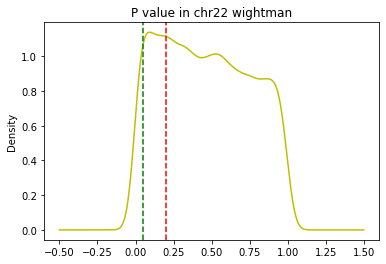

In [14]:
print(sst_dict[sst_dict['P']<0])
print((sst_dict['P']).describe())
sst_dict['P'].plot.kde(title='P value in chr22 wightman', color='y')

plt.axvline(0.2, color='r', linestyle='--', label='0.2')
plt.axvline(0.05, color='g', linestyle='--', label='0.05')

In [15]:
nz = torch.tensor(sst_dict['P'] < 0.2)
print(nz.sum())
print(nz)

tensor(3221)
tensor([False, False, False,  ..., False, False, False])


In [16]:
torch.tensor(sst_dict['P'] < 0.05).sum()

tensor(912)

In [8]:
simulate.simulate_perfect_anno(sst_dict, 0.05)[0][:10]

tensor([[ 1.0000,  0.0000, -1.1128],
        [ 1.0000,  0.0000, -1.0757],
        [ 1.0000,  0.0000, -1.2305],
        [ 1.0000,  0.0000,  0.9635],
        [ 1.0000,  0.0000,  0.8631],
        [ 1.0000,  0.0000,  0.1742],
        [ 1.0000,  0.0000, -0.8930],
        [ 1.0000,  0.0000, -0.5476],
        [ 1.0000,  0.0000,  0.0609],
        [ 1.0000,  0.0000, -0.1098]])

In [19]:
(sst_dict['P'] < 0.05).sum()*100/sst_dict.shape[0]

6.672031604360231

In [12]:
(sst_dict['P'] < 0.2).sum()*100/sst_dict.shape[0]

23.56426951496086

In [18]:
sst_dict[:10]

,CHR,SNP,BP,A1,A2,MAF,BETA,FLP,P,PRSCS_beta
0,22,rs5747620,17032698,C,T,0.40470,0.000351,1,0.875318,0.000034
1,22,rs9605903,17054720,C,T,0.27760,-0.000424,1,0.849729,-0.000012
2,22,rs5747940,17056415,C,T,0.50930,-0.000238,-1,0.915255,-0.000049
3,22,rs5746647,17057138,G,T,0.05351,0.000470,1,0.833665,-0.000002
4,22,rs9605927,17067005,C,T,0.02690,0.002485,1,0.266396,0.000359
5,22,rs5747968,17067504,G,T,0.33850,-0.003233,1,0.148164,-0.000265
6,22,rs5746664,17074622,A,C,0.05891,0.000031,1,0.988860,-0.000028
7,22,rs5747999,17075353,C,A,0.16130,0.000096,1,0.965586,-0.000018
8,22,rs2070501,17084609,A,G,0.37280,0.001694,1,0.448765,0.000137
9,22,rs2154615,17100497,T,C,0.14430,0.000266,1,0.905444,0.000046


In [20]:
simulate.simulate_perfect_anno(sst_dict, 0.2)[0][:10]

tensor([[ 1.0000,  0.0000, -1.5935],
        [ 1.0000,  0.0000, -0.4884],
        [ 1.0000,  0.0000, -1.7526],
        [ 1.0000,  0.0000,  1.7011],
        [ 1.0000,  0.0000, -1.1033],
        [ 1.0000,  1.0000, -1.1790],
        [ 1.0000,  0.0000,  0.5492],
        [ 1.0000,  0.0000, -0.2581],
        [ 1.0000,  0.0000,  1.1030],
        [ 1.0000,  0.0000,  0.0593]])

/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


Text(0.5, 1.0, 'pearson r for betas in every iteration')

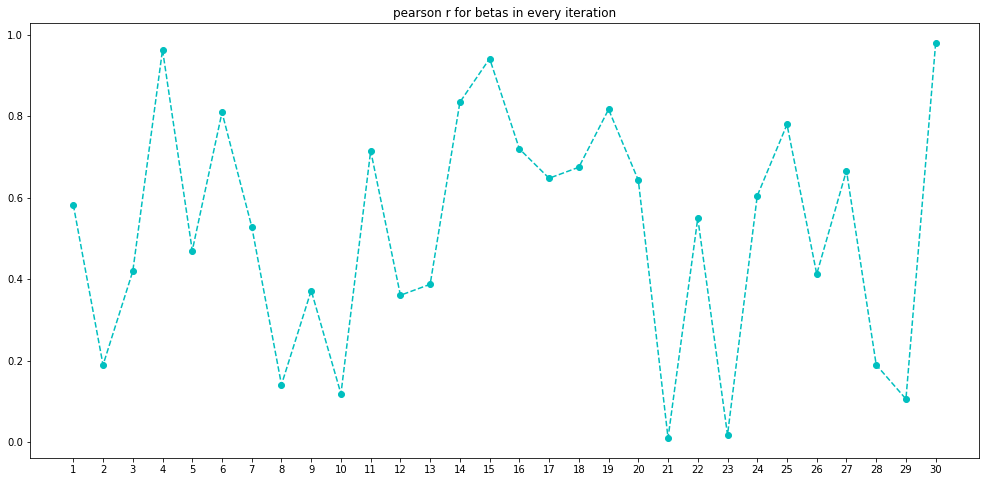

In [39]:
refit_time = 30

rand_list = []
for i in range(refit_time):
    rand_list.append(random())
    
plt.figure(num=None, figsize=(17, 8))
plt.plot(range(refit_time),rand_list, marker='o', linestyle='--', color='c')
ax = plt.axes()
    #ax.set_ylim(0.5, 1)
plt.xticks(list(range(refit_time)),list(range(1,refit_time+1)))
plt.title('pearson r for betas in every iteration')


In [24]:
#p = 13669
print(torch.stack([torch.ones(p),nz,torch.randn(p)]).T [:10])

tensor([[ 1.0000,  0.0000, -1.2050],
        [ 1.0000,  0.0000, -0.9391],
        [ 1.0000,  0.0000,  0.7318],
        [ 1.0000,  0.0000, -1.1613],
        [ 1.0000,  0.0000, -0.1122],
        [ 1.0000,  1.0000,  0.0504],
        [ 1.0000,  0.0000, -0.3033],
        [ 1.0000,  0.0000, -0.9861],
        [ 1.0000,  0.0000, -0.9300],
        [ 1.0000,  0.0000, -0.4760]])


In [14]:
beta_true, beta_mrg, annotations, anno_names = simulate.simulate_sumstats(ld_blk, blk_size, param_dict['n_gwas'], len(sst_dict), sst_dict,anno_path = param_dict['anno_path'], chrom=chrom,prop_nz = 0.2)


prop_nz = 0.200000
simulating anno...
using real betas from sumstats ...


sim 1k SNP
fig will be saved in /gpfs/commons/home/tlin/pic/casioPR/simulation/1019/test_iter2_614_
... parse reference file: /gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/LD_PRScs/ldblk_ukbb_eur/snpinfo_ukbb_hm3 ...
... parse sumstats file: test_data/sumstats.txt ...
... 991 common SNPs in the reference, sumstats, and validation set ...
There are 4 ld_block. 

prop_nz = 0.200000
simulating anno...
simulating betas...
start VI...
Re-train the model 1 time(s)
... Starting SVI ...
Degenerate LD mat (min eigenvalue=-4.234e-04), fixing to 1.000e-03
Degenerate LD mat (min eigenvalue=-1.678e-03), fixing to 1.000e-03
Degenerate LD mat (min eigenvalue=-2.295e-02), fixing to 1.000e-03
Degenerate LD mat (min eigenvalue=-8.785e-04), fixing to 1.000e-03
Done after 352 iterations. Increasing num_particles to 2.
Done after 222 iterations. Increasing num_particles to 4.
Done after 90 iterations. Increasing num_particles to 8.
Done in 466.26 seconds 

phi_prior True
constrain_sigma True
Re-train

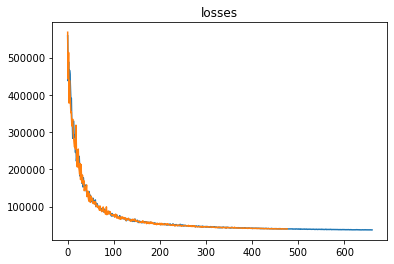

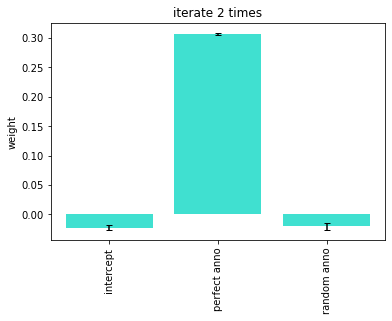

/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


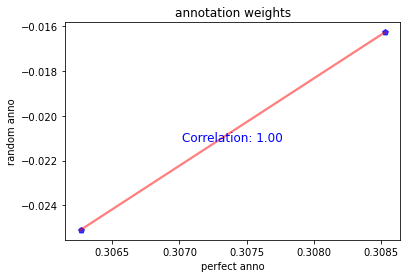

/gpfs/commons/home/tlin/script/casopr/test_simulation.py:151: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


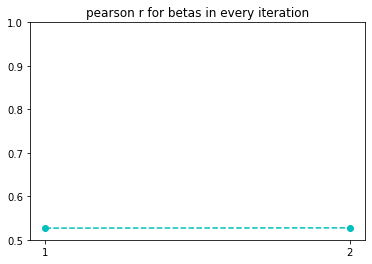

anno_weight
          0         1         2
0 -0.025942  0.308532 -0.016267
1 -0.020035  0.306262 -0.025097


person R list
[0.5268450659324301, 0.5274965716224363]


(          0         1         2
 0 -0.025942  0.308532 -0.016267
 1 -0.020035  0.306262 -0.025097,
 [0.5268450659324301, 0.5274965716224363])

In [54]:
#import test_simulation
test_simulation.check_sim_result("test", False, test= 'sim',refit_time = 2)

fig will be saved in /gpfs/commons/home/tlin/pic/casioPR/simulation/1019/chr22_iter5_3t3_
... parse reference file: /gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/LD_PRScs/ldblk_ukbb_eur/snpinfo_ukbb_hm3 ...
... parse sumstats file: test_data/wightman_chr22.tsv ...
... 13669 common SNPs in the reference, sumstats, and validation set ...
There are 24 ld_block. 

prop_nz = 0.200000
simulating anno...
using real betas from sumstats ...
start VI...
Fitting model 1 time(s)
... Starting SVI ...
Degenerate LD mat (min eigenvalue=-9.060e-04), fixing to 1.000e-03
Degenerate LD mat (min eigenvalue=-2.416e-03), fixing to 1.000e-03
Degenerate LD mat (min eigenvalue=-2.087e-02), fixing to 1.000e-03
Degenerate LD mat (min eigenvalue=-5.386e-03), fixing to 1.000e-03
Degenerate LD mat (min eigenvalue=-1.032e-02), fixing to 1.000e-03
Degenerate LD mat (min eigenvalue=-3.347e-03), fixing to 1.000e-03
Degenerate LD mat (min eigenvalue=-4.880e-03), fixing to 1.000e-03
Degenerate LD mat (min eigenvalu

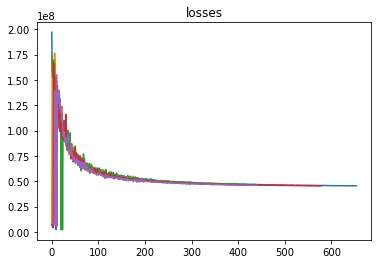

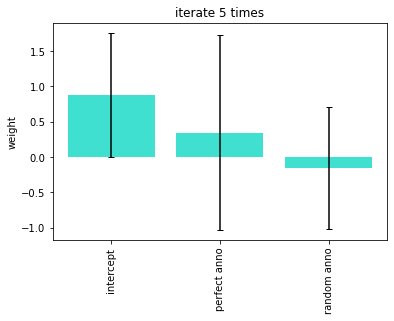

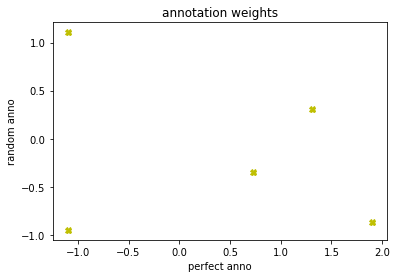

/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:84: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


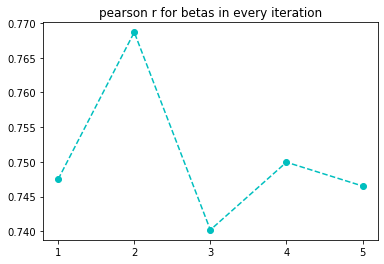

anno_weight
          0         1         2
0  1.070448  1.304388  0.303840
1  1.739533 -1.096399 -0.949032
2  1.076671  0.722528 -0.344146
3 -0.616623  1.901384 -0.865009
4  1.126230 -1.098776  1.106869


person R list
[0.7475040883744885, 0.7686679771741901, 0.7402036284649993, 0.7499553661458432, 0.7465255389783307]


(          0         1         2
 0  1.070448  1.304388  0.303840
 1  1.739533 -1.096399 -0.949032
 2  1.076671  0.722528 -0.344146
 3 -0.616623  1.901384 -0.865009
 4  1.126230 -1.098776  1.106869,
 [0.7475040883744885,
  0.7686679771741901,
  0.7402036284649993,
  0.7499553661458432,
  0.7465255389783307])

In [50]:
check_sim_result(chr22_dict, refit_time=5)

In [47]:
importlib.reload(simulate)
importlib.reload(parse_genet)
## add annotations, add iteration. add path for saving the plot
## can still run if you want to simulate anno
def check_sim_result(param_dict,  chrom=22, refit_time=1,prop_nz = 0.2, prscs_file = 'test_data/prscs_wightman_ADSP_ibd_36k.txt'):
    
    ## handling the pic saving repo
    random_name = ''.join(random.choices(string.ascii_lowercase +string.digits, k=3))
    date = pd.Timestamp(datetime.date.today()).strftime("%m%d")
    save_dir = '/gpfs/commons/home/tlin/pic/casioPR/simulation/' + date
    
    if not os.path.isdir(save_dir):
        os.mkdir(save_dir)

    path= save_dir + '/' + param_dict['save_fig_name'] + '_' + 'iter%d'%refit_time +'_'+random_name +'_'
    print("fig will be saved in %s"%path)
    
    if '1kg' in os.path.basename(param_dict['ref_dir']):
        ref_df = parse_genet.parse_ref(param_dict['ref_dir'] + '/snpinfo_1kg_hm3')
    elif 'ukbb' in os.path.basename(param_dict['ref_dir']):
        ref_df = parse_genet.parse_ref(param_dict['ref_dir'] + '/snpinfo_ukbb_hm3')

    ref_df = ref_df[ref_df.CHR == chrom]
    vld_df = parse_genet.parse_bim(param_dict['bim_prefix'] + ".bim")
    vld_df = vld_df[vld_df.CHR == chrom]
    sst_dict = parse_genet.parse_sumstats(ref_df, vld_df, param_dict['sst_file'], param_dict['n_gwas'])
                                                                                                                                                                  
    if param_dict['anno_path'] == False:  ## This will be sim
        ld_blk, ld_blk_sym, blk_size = parse_genet.parse_ldblk(param_dict['ref_dir'], sst_dict, chrom)
        print("There are %s ld_block. \n" %(len(ld_blk)))
        beta_true, beta_mrg, annotations, anno_names = simulate.simulate_sumstats(ld_blk, blk_size, param_dict['n_gwas'], len(sst_dict), sst_dict,anno_path = param_dict['anno_path'], chrom=chrom,prop_nz = prop_nz)
        sst_dict["BETA"] = beta_mrg
    else: ## real case doesn't need simulated betas   
        prscs_beta = pd.read_csv(prscs_file, sep = '\t', header = None, names = ['CHR','SNP','BP','A1','A2','PRSCS_beta'])
        sst_dict = sst_dict.merge( prscs_beta[['SNP','PRSCS_beta']], on = 'SNP') 
        ld_blk, ld_blk_sym, blk_size = parse_genet.parse_ldblk(param_dict['ref_dir'], sst_dict, chrom)        
        print("There are %s ld_block. \n" %(len(ld_blk)))
        annotations, anno_names =  parse_genet.parse_anno(param_dict["anno_path"], sst_dict, chrom = chrom)
        beta_true = sst_dict['PRSCS_beta']

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    anno_names.insert(0,'intercept')
    print("start VI...")
    importlib.reload(vi)
    #one = torch.tensor(1., device=device)
    
    pearsonr_list=[]
    anno_list=pd.DataFrame()

    for i in range(refit_time):
        print('Fitting model %d time(s)'% (i+1))
        losses, beta, phi_est, stats = vi.vi(sst_dict, param_dict['n_gwas'], ld_blk, blk_size, device = device, annotations = annotations, max_iterations = param_dict['n_iter'], max_particles=4, desired_min_eig = 1e-3, min_iterations = 200, stall_window = 30, phi_as_prior = False, lr = 0.03, constrain_sigma = True)
        plt.plot(losses);plt.title('losses');#plt.savefig(save_dir + '/loss/'+ param_dict['save_fig_name'] + '_' + 'iter%d'%refit_time +'_'+random_name +'_' +'loss_%s.png'%i);
        
        if i == refit_time-1:
            plt.savefig(path+'loss.pdf',format ='pdf',bbox_inches='tight');plt.show()
            
        r=scipy.stats.pearsonr(beta_true,beta)[0]
        pearsonr_list.append(r)

        ## check anno
        anno_df = pd.DataFrame.from_dict(stats["annotation_weights"] )
        anno_list = anno_list.append(anno_df["mean"].to_frame().T, ignore_index=True)  
    
    ## plot anno  
    plt.bar(anno_list.mean().index, anno_list.mean(), yerr=anno_list.std(), capsize=3, color='turquoise')
    plt.xticks(anno_list.mean().index, anno_names, rotation=90)
    plt.ylabel('weight')
    plt.title('iterate %d times'%(refit_time))
    plt.savefig(path+'anno_weight.pdf',format ='pdf',bbox_inches='tight');plt.show()
    #print(stats["annotation_weights"]) # ideally should show large positive value for second entry, and close to 0 for third (noise)
    
    ## only_for_perfect_anno
    if param_dict["anno_path"] == False:
        plt.figure()
        plt.plot(anno_list.iloc[:][1],anno_list.iloc[:][2], marker='X', linestyle='None', color='y')
        plt.xlabel('perfect anno')
        plt.ylabel('random anno')
        plt.title('annotation weights')
        plt.savefig(path+'anno_weight_scatter.pdf',format ='pdf');plt.show()   

    ## plot r
    plt.plot(range(refit_time), pearsonr_list, marker='o', linestyle='--', color='c')
    ax = plt.axes()
    #ax.set_ylim(0.5, 1)
    plt.xticks(list(range(refit_time)),list(range(1,refit_time+1)))
    plt.title('pearson r for betas in every iteration')
    plt.savefig(path+'betas.pdf',format ='pdf');plt.show()   
    
    print('anno_weight')
    print(anno_list)
    
    print('\n')
    print('person R list')
    print(pearsonr_list)
    return(anno_list,pearsonr_list)        

In [27]:
sim_dict.update(save_fig_name = 'perfect_anno_1kSNP_prop_nz_0.1')
sim_dict

{'ref_dir': '/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/LD_PRScs/ldblk_ukbb_eur',
 'bim_prefix': 'test_data/test',
 'sst_file': 'test_data/sumstats.txt',
 'n_gwas': 200000,
 'out_dir': 'test_data',
 'seed': 42,
 'beta_std': 'False',
 'n_iter': 1000,
 'anno_path': False,
 'save_fig_name': 'perfect_anno_1kSNP_prop_nz_0.1'}

fig will be saved in /gpfs/commons/home/tlin/pic/casioPR/simulation/09_26/perfect_anno_1kSNP_prop_nz_0.1_iter20_mgc_
... parse reference file: /gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/LD_PRScs/ldblk_ukbb_eur/snpinfo_ukbb_hm3 ...
... parse sumstats file: test_data/sumstats.txt ...
... 991 common SNPs in the reference, sumstats, and validation set ...
There are 4 ld_block. 

prop_nz = 0.100000
simulating anno...
start VI...
Fitting model 1 time(s)
... Starting SVI ...
Degenerate LD mat (min eigenvalue=-4.233e-04), fixing to 1.000e-03
Degenerate LD mat (min eigenvalue=-1.678e-03), fixing to 1.000e-03
Degenerate LD mat (min eigenvalue=-2.295e-02), fixing to 1.000e-03
Degenerate LD mat (min eigenvalue=-8.785e-04), fixing to 1.000e-03
Done after 217 iterations. Increasing num_particles to 2.
Done after 141 iterations. Increasing num_particles to 4.
Done after 99 iterations. Increasing num_particles to 8.
Done in 170.65 seconds 

Fitting model 2 time(s)
... Starting SVI ...
Degener

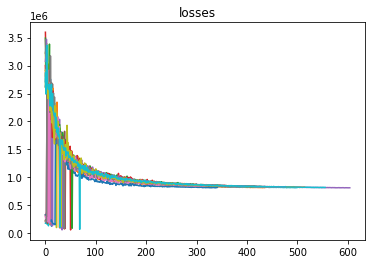

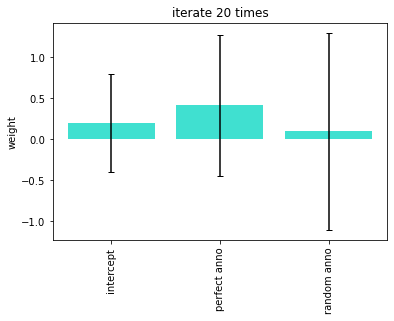

/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:67: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


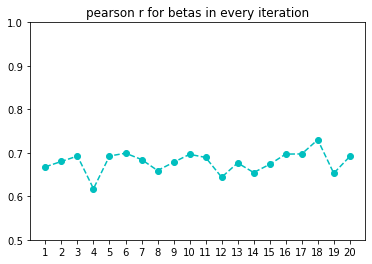

anno_weight
           0         1         2
0   0.477210  0.195098  1.064405
1   0.451540  0.033658 -1.270331
2   0.067783 -0.732207  1.397358
3   0.437854  1.136169  1.021282
4   0.254296  1.701143 -0.958210
5  -0.797951 -0.451852  1.631523
6  -1.156494 -0.462057  1.654085
7   0.229240  0.770584 -1.168949
8   0.717061 -0.123557 -0.803604
9   1.444456 -0.223713 -0.864543
10 -0.307100 -0.520524 -1.340132
11  0.027244  1.035960 -0.973780
12  0.354528  0.368033  1.178714
13  0.305156  0.525511  1.201790
14  1.071155  1.020517 -0.812941
15  0.608864 -0.299105 -1.305261
16 -0.432242  2.055393  1.065881
17 -0.397972  2.159701  1.201543
18  0.223443  0.074532  1.128617
19  0.429454  0.023194 -1.111142


person R list
[0.6678537222135957, 0.6802276124255157, 0.692593938074104, 0.6175492179418067, 0.6926272005005416, 0.6991597120434098, 0.6846352484384597, 0.6593244371428565, 0.6781626570002225, 0.6965772313859562, 0.6894331877338741, 0.643889033018534, 0.6767537891343961, 0.6546642798240038, 

(           0         1         2
 0   0.477210  0.195098  1.064405
 1   0.451540  0.033658 -1.270331
 2   0.067783 -0.732207  1.397358
 3   0.437854  1.136169  1.021282
 4   0.254296  1.701143 -0.958210
 5  -0.797951 -0.451852  1.631523
 6  -1.156494 -0.462057  1.654085
 7   0.229240  0.770584 -1.168949
 8   0.717061 -0.123557 -0.803604
 9   1.444456 -0.223713 -0.864543
 10 -0.307100 -0.520524 -1.340132
 11  0.027244  1.035960 -0.973780
 12  0.354528  0.368033  1.178714
 13  0.305156  0.525511  1.201790
 14  1.071155  1.020517 -0.812941
 15  0.608864 -0.299105 -1.305261
 16 -0.432242  2.055393  1.065881
 17 -0.397972  2.159701  1.201543
 18  0.223443  0.074532  1.128617
 19  0.429454  0.023194 -1.111142,
 [0.6678537222135957,
  0.6802276124255157,
  0.692593938074104,
  0.6175492179418067,
  0.6926272005005416,
  0.6991597120434098,
  0.6846352484384597,
  0.6593244371428565,
  0.6781626570002225,
  0.6965772313859562,
  0.6894331877338741,
  0.643889033018534,
  0.6767537891343961,
 

In [28]:
check_sim_result(sim_dict,  chrom=22, refit_time=20, prop_nz = 0.1)

In [7]:
chr22_dict.update(save_fig_name = 'perfect_anno_chr22_prop_nz_0.1')
chr22_dict

{'ref_dir': '/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/LD_PRScs/ldblk_ukbb_eur',
 'bim_prefix': 'test_data/ADSP_qc_chr22',
 'sst_file': 'test_data/wightman_chr22.tsv',
 'n_gwas': 200000,
 'out_dir': 'test_data',
 'seed': 42,
 'beta_std': 'False',
 'n_iter': 1000,
 'anno_path': False,
 'save_fig_name': 'perfect_anno_chr22_prop_nz_0.1'}

fig will be saved in /gpfs/commons/home/tlin/pic/casioPR/simulation/0928/chr22_iter1_j9m_
... parse reference file: /gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/LD_PRScs/ldblk_ukbb_eur/snpinfo_ukbb_hm3 ...
... parse sumstats file: test_data/wightman_chr22.tsv ...
... 14014 common SNPs in the reference, sumstats, and validation set ...
There are 24 ld_block. 

prop_nz = 0.100000
simulating anno...
start VI...
Fitting model 1 time(s)
... Starting SVI ...
Degenerate LD mat (min eigenvalue=-9.351e-04), fixing to 1.000e-03
Degenerate LD mat (min eigenvalue=-2.456e-03), fixing to 1.000e-03
Degenerate LD mat (min eigenvalue=-2.087e-02), fixing to 1.000e-03
Degenerate LD mat (min eigenvalue=-5.423e-03), fixing to 1.000e-03
Degenerate LD mat (min eigenvalue=-1.136e-02), fixing to 1.000e-03
Degenerate LD mat (min eigenvalue=-3.357e-03), fixing to 1.000e-03
Degenerate LD mat (min eigenvalue=-5.320e-03), fixing to 1.000e-03
Degenerate LD mat (min eigenvalue=-2.546e-03), fixing to 1.000e-03


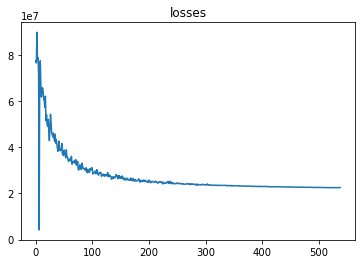

/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


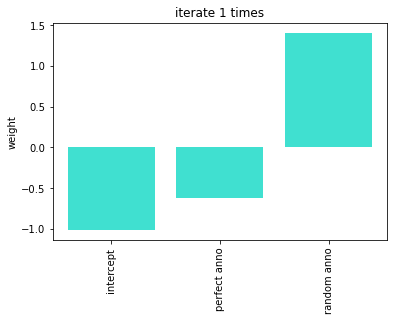

/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:67: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


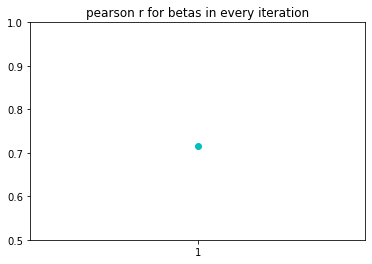

anno_weight
          0         1         2
0 -1.018717 -0.624669  1.409911


person R list
[0.715173266517596]


(          0         1         2
 0 -1.018717 -0.624669  1.409911,
 [0.715173266517596])

In [6]:
check_sim_result(chr22_dict,  chrom=22, refit_time = 1, prop_nz = 0.1)

In [7]:
chrom=22
ref_df = parse_genet.parse_ref(chr22_dict['ref_dir'] + '/snpinfo_ukbb_hm3')
ref_df = ref_df[ref_df.CHR == chrom]
vld_df = parse_genet.parse_bim(chr22_dict['bim_prefix'] + ".bim")
vld_df = vld_df[vld_df.CHR == chrom]
sst_dict = parse_genet.parse_sumstats(ref_df, vld_df, chr22_dict['sst_file'], chr22_dict['n_gwas'])
ld_blk, ld_blk_sym, blk_size = parse_genet.parse_ldblk(chr22_dict['ref_dir'], sst_dict, chrom)   

... parse reference file: /gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/LD_PRScs/ldblk_ukbb_eur/snpinfo_ukbb_hm3 ...
... parse sumstats file: test_data/wightman_chr22.tsv ...
... 14014 common SNPs in the reference, sumstats, and validation set ...


In [8]:
## get beta_true, beta_mrg, annotations, anno_names when nz = 0.2
n_gwas = 200000
sigma_noise = 1.
prop_nz = 0.2
beta_sd = 0.1
p = len(sst_dict)
sigma_over_sqrt_n = sigma_noise / torch.sqrt(torch.tensor(n_gwas))
print('prop_nz = %f'%prop_nz) 
nz = torch.rand(p) < prop_nz
beta_true = torch.where(nz, beta_sd * torch.randn(p), torch.zeros(p))
annotations_02 = torch.stack([torch.ones(p),nz,torch.randn(p)]).T
print(torch.sum(nz).item())
beta_mrg = torch.zeros(p)
anno_names = ["perfect anno",'random anno']

mm = 0
for kk in range(len(ld_blk)):
    idx_blk = torch.arange(mm,mm+blk_size[kk])
    ld_torch = torch.tensor(ld_blk[kk], dtype = torch.float)
    L, V = torch.linalg.eigh(ld_torch)
    L[L < 0.] = 0.

    beta_mrg[idx_blk] = ld_torch @ beta_true[idx_blk] + sigma_over_sqrt_n * (V @ torch.diag(L.sqrt())) @ torch.randn(blk_size[kk])
    mm += blk_size[kk]
    

prop_nz = 0.200000
2830


In [10]:
prop_nz= 0.05
print('prop_nz = %f'%prop_nz) 
nz = torch.rand(p) < prop_nz
beta_true_005 = torch.where(nz, beta_sd * torch.randn(p), torch.zeros(p))
annotations_005 = torch.stack([torch.ones(p),nz,torch.randn(p)]).T
print(torch.sum(nz).item())
beta_mrg_005 = torch.zeros(p)
anno_names_005 = ["perfect anno",'random anno']

mm = 0
for kk in range(len(ld_blk)):
    idx_blk = torch.arange(mm,mm+blk_size[kk])
    ld_torch = torch.tensor(ld_blk[kk], dtype = torch.float)
    L, V = torch.linalg.eigh(ld_torch)
    L[L < 0.] = 0.

    beta_mrg_005[idx_blk] = ld_torch @ beta_true_005[idx_blk] + sigma_over_sqrt_n * (V @ torch.diag(L.sqrt())) @ torch.randn(blk_size[kk])
    mm += blk_size[kk]

prop_nz = 0.050000
670


In [13]:
print(torch.sum(beta_mrg_005).item())
print(torch.sum(beta_mrg).item())


43.67596435546875
29.166034698486328


In [20]:
print(torch.sum(annotations_005[:,1]).item())
print(torch.sum(annotations_02[:,1]).item())

670.0
2830.0


In [50]:
sst_dict["BETA"] = beta_mrg
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
anno_names.insert(0,'intercept')
print("start VI...")
importlib.reload(vi)

start VI...


<module 'vi' from '/gpfs/commons/home/tlin/script/casopr/vi.py'>

... Starting SVI ...
Degenerate LD mat (min eigenvalue=-9.352e-04), fixing to 1.000e-03
Degenerate LD mat (min eigenvalue=-2.456e-03), fixing to 1.000e-03
Degenerate LD mat (min eigenvalue=-2.087e-02), fixing to 1.000e-03
Degenerate LD mat (min eigenvalue=-5.423e-03), fixing to 1.000e-03
Degenerate LD mat (min eigenvalue=-1.136e-02), fixing to 1.000e-03
Degenerate LD mat (min eigenvalue=-3.357e-03), fixing to 1.000e-03
Degenerate LD mat (min eigenvalue=-5.320e-03), fixing to 1.000e-03
Degenerate LD mat (min eigenvalue=-2.545e-03), fixing to 1.000e-03
Degenerate LD mat (min eigenvalue=-3.650e-03), fixing to 1.000e-03
Degenerate LD mat (min eigenvalue=-6.476e-03), fixing to 1.000e-03
Degenerate LD mat (min eigenvalue=-1.174e-02), fixing to 1.000e-03
Degenerate LD mat (min eigenvalue=-1.371e-02), fixing to 1.000e-03
Degenerate LD mat (min eigenvalue=-4.008e-03), fixing to 1.000e-03
Degenerate LD mat (min eigenvalue=-1.265e-02), fixing to 1.000e-03
Degenerate LD mat (min eigenvalue=-1.096e

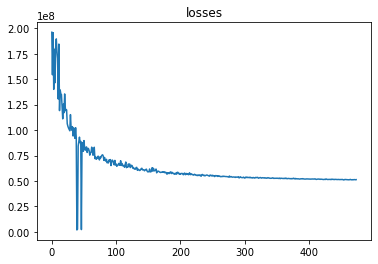

In [58]:
pearsonr_list=[]
anno_list=pd.DataFrame()
refit_time=1

losses, beta, phi_est, stats = vi.vi(sst_dict, chr22_dict['n_gwas'], ld_blk, blk_size, device = device, annotations = annotations, max_iterations = chr22_dict['n_iter'], max_particles=4, desired_min_eig = 1e-3, min_iterations = 200, stall_window = 30, phi_as_prior = False, lr = 0.03, constrain_sigma = True)
plt.plot(losses);plt.title('losses');#plt.savefig(save_dir + '/loss/'+ param_dict['save_fig_name'] + '_' + 'iter%d'%refit_time +'_'+random_name +'_' +'loss_%s.png'%i);
plt.show()
            
            
r=scipy.stats.pearsonr(beta_true,beta)[0]
pearsonr_list.append(r)

## check anno
anno_df = pd.DataFrame.from_dict(stats["annotation_weights"] )
anno_list = anno_list.append(anno_df["mean"].to_frame().T, ignore_index=True)  
    
    

In [59]:
anno_list

,0,1,2
0,0.579539,0.506434,0.956915


In [38]:
n_gwas = 200000
sigma_noise = 1.
prop_nz = 0.05
beta_sd = 0.1
p = len(sst_dict)
sigma_over_sqrt_n = sigma_noise / torch.sqrt(torch.tensor(n_gwas))
print('prop_nz = %f'%prop_nz) 
nz = torch.rand(p) < prop_nz
beta_true = torch.where(nz, beta_sd * torch.randn(p), torch.zeros(p))
annotations_005 = torch.stack([torch.ones(p),nz,torch.randn(p)]).T
print(torch.sum(nz).item())

prop_nz = 0.050000
749


In [39]:
torch.equal(annotations_02, annotations_005)

False

In [40]:
torch.rand(p)

tensor([0.0521, 0.9808, 0.9768,  ..., 0.2160, 0.3149, 0.5086])